In [1]:
def open_file():
    with open('CONVERTED_SKILLS.csv') as infile:
        return [line.strip().split(',') for line in infile.readlines()]
    
open_file()[1:5]
all_lines = open_file()[1:]

In [3]:
all_lines[:2]

[['a certified',
  'network certified',
  'laptops',
  'n certified',
  'computer hardware',
  'windows 7',
  'comptia',
  'troubleshooting',
  'software installation',
  'printers',
  'xp'],
 ['a certified it technician',
  'n certified',
  'network certified',
  'comptia network certified',
  'comptia a certification',
  'a certified professional',
  'mcdst',
  'windows 7',
  'computer hardware',
  'computer repair',
  'a certified']]

In [7]:
# delete null values

def delete_null_words(line):
    return [word for word in line if word != 'null']

def delete_null():
    return [delete_null_words(bad_line) for bad_line in all_lines]

not_null_lines = delete_null()


# tokenize words

def tokenize_line(line):
    return [n_gram.split() for n_gram in line]

def tokenize_words():
    return [tokenize_line(untokenized_line) for untokenized_line in not_null_lines]

tokenized_lines = tokenize_words()


# remove stopwords

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords_ngram(ngram):
    return [word for word in ngram if word not in stop_words]

def remove_stopwords_line(line):
    return [remove_stopwords_ngram(n_gram) for n_gram in line]

def delete_stopwords():
    return [remove_stopwords_line(the_line) for the_line in tokenized_lines]

no_stopwords_lines = delete_stopwords()

# stemming

from nltk.stem import PorterStemmer
porter = PorterStemmer()

def stem_a_ngram(ngram):
    return [porter.stem(word) for word in ngram]

def stem_a_line(line):
    return [stem_a_ngram(ngram) for ngram in line]

def stem_all():
    return [stem_a_line(a_line) for a_line in no_stopwords_lines]

stemmed_lines = stem_all()

# remove n-grams

def flat_line(line):
    return [word for n_gram in line for word in n_gram]

def all_tokenized():
    return [flat_line(one_line) for one_line in stemmed_lines]

individual_word_lines = all_tokenized()

In [8]:
individual_word_lines[:2]

[['certifi',
  'network',
  'certifi',
  'laptop',
  'n',
  'certifi',
  'comput',
  'hardwar',
  'window',
  '7',
  'comptia',
  'troubleshoot',
  'softwar',
  'instal',
  'printer',
  'xp'],
 ['certifi',
  'technician',
  'n',
  'certifi',
  'network',
  'certifi',
  'comptia',
  'network',
  'certifi',
  'comptia',
  'certif',
  'certifi',
  'profession',
  'mcdst',
  'window',
  '7',
  'comput',
  'hardwar',
  'comput',
  'repair',
  'certifi']]

In [55]:
flat_list = [word for nested in individual_word_lines for word in nested]

flat_list[:20]

['certifi',
 'network',
 'certifi',
 'laptop',
 'n',
 'certifi',
 'comput',
 'hardwar',
 'window',
 '7',
 'comptia',
 'troubleshoot',
 'softwar',
 'instal',
 'printer',
 'xp',
 'certifi',
 'technician',
 'n',
 'certifi']

### Descriptive analytics

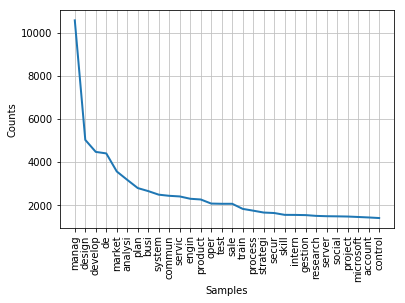

In [58]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

fdist = FreqDist(flat_list) 
fdist.plot(30,cumulative=False)
plt.show()

The figure below shows:
- all (tokenized and cleaned) words in one flat list
- management, design and development seem to occur the most

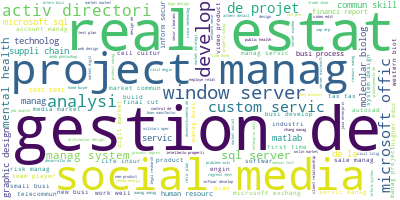

In [63]:
# import the wordcloud library
from wordcloud import WordCloud

# join the different processed titles together
long_string = ','.join(flat_list)

# create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(long_string)

# visualize the word cloud
wordcloud.to_image()

### Modeling

In [9]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
# import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
C:\Users\itzel\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [65]:
# Create Dictionary
id2word = corpora.Dictionary(individual_word_lines)

# Create Corpus
corpus_lines = individual_word_lines

# Term Document Frequency
corpus = [id2word.doc2bow(corpus_line) for corpus_line in corpus_lines]

# View
print(corpus[2])
pprint(corpus_lines[2])

[(0, 1), (1, 6), (2, 1), (3, 1), (4, 1), (7, 1), (8, 2), (11, 1), (12, 2), (16, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]
['certifi',
 'profession',
 'network',
 'certifi',
 'comptia',
 'network',
 'certifi',
 'n',
 'certifi',
 'microsoft',
 'certifi',
 'profession',
 'certifi',
 'technician',
 'troubleshoot',
 'window',
 '7',
 'activ',
 'directori',
 'comput',
 'hardwar',
 'window',
 'server']


In [11]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [12]:
# topics for this lda model with 20 topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"instruct" + 0.043*"edit" + 0.036*"photographi" + 0.029*"xp" + '
  '0.016*"journal" + 0.015*"printer" + 0.015*"photoshop" + 0.014*"adob" + '
  '0.014*"learn" + 0.014*"write"'),
 (1,
  '0.056*"wine" + 0.033*"health" + 0.024*"workflow" + 0.024*"gener" + '
  '0.023*"therapi" + 0.020*"medicin" + 0.018*"translat" + 0.017*"massag" + '
  '0.015*"case" + 0.015*"english"'),
 (2,
  '0.059*"tax" + 0.047*"account" + 0.037*"transport" + 0.023*"bank" + '
  '0.022*"estat" + 0.018*"logist" + 0.015*"theori" + 0.014*"real" + '
  '0.014*"python" + 0.013*"small"'),
 (3,
  '0.101*"youth" + 0.068*"oper" + 0.038*"onlin" + 0.028*"safeti" + '
  '0.022*"search" + 0.022*"yacht" + 0.022*"util" + 0.021*"commerci" + '
  '0.019*"mine" + 0.017*"chain"'),
 (4,
  '0.106*"work" + 0.065*"well" + 0.045*"skill" + 0.031*"linux" + '
  '0.019*"custom" + 0.017*"learn" + 0.016*"power" + 0.015*"commun" + '
  '0.014*"written" + 0.011*"solari"'),
 (5,
  '0.090*"plan" + 0.038*"law" + 0.038*"travel" + 0.034*"solut" + 0

In [13]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=individual_word_lines, 
                                     dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.917468998411773

Coherence Score:  0.4450073140570757


In [14]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\itzel\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.027495 -0.123950       1        1  10.210319
15     0.305486  0.007382       2        1   7.289816
13    -0.010474 -0.042077       3        1   6.289117
8      0.238961  0.008725       4        1   6.081172
7     -0.056800 -0.091205       5        1   5.778504
11    -0.088563 -0.110684       6        1   5.748762
6     -0.038296  0.239621       7        1   5.053923
9     -0.102507  0.024677       8        1   5.024909
18    -0.081088  0.199690       9        1   4.778538
4      0.111040 -0.085141      10        1   4.683461
17     0.206030 -0.021013      11        1   4.518188
14    -0.070926 -0.123203      12        1   4.199333
3     -0.058965  0.105883      13        1   4.094974
1     -0.037775 -0.085355      14        1   4.052988
5      0.013324  0.254221      15        1   4.037822
19    -0.084934 -0.028556      16        1   4.021645
2     -0.044940  0.013927      17        1   3.927366
12    -0.087686 -0.032706      18        1   3.668322
16    -0.034047 -0.049935      19        1   3.577569
0     -0.050344 -0.060301      20        1   2.963273, topic_info=      Category         Freq          Term        Total  loglift  logprob
76     Default  9894.000000         manag  9894.000000  30.0000  30.0000
184    Default  4426.000000        design  4426.000000  29.0000  29.0000
479    Default  5186.000000       develop  5186.000000  28.0000  28.0000
144    Default  3878.000000          test  3878.000000  27.0000  27.0000
12     Default  3578.000000        window  3578.000000  26.0000  26.0000
55     Default  3121.000000         train  3121.000000  25.0000  25.0000
145    Default  2670.000000           web  2670.000000  24.0000  24.0000
794    Default  3003.000000            de  3003.000000  23.0000  23.0000
80     Default  2782.000000          work  2782.000000  22.0000  22.0000
499    Default  2559.000000        market  2559.000000  21.0000  21.0000
1837   Default  2303.000000         youth  2303.000000  20.0000  20.0000
22     Default  2514.000000        server  2514.000000  19.0000  19.0000
596    Default  2563.000000          plan  2563.000000  18.0000  18.0000
68     Default  2642.000000        system  2642.000000  17.0000  17.0000
740    Default  2124.000000         engin  2124.000000  16.0000  16.0000
394    Default  2779.000000        servic  2779.000000  15.0000  15.0000
403    Default  1704.000000          well  1704.000000  14.0000  14.0000
513    Default  1935.000000          sale  1935.000000  13.0000  13.0000
23     Default  2181.000000        commun  2181.000000  12.0000  12.0000
584    Default  1560.000000          oper  1560.000000  11.0000  11.0000
501    Default  1591.000000      strategi  1591.000000  10.0000  10.0000
821    Default  1623.000000         video  1623.000000   9.0000   9.0000
79     Default  1542.000000        visual  1542.000000   8.0000   8.0000
820    Default  1481.000000         secur  1481.000000   7.0000   7.0000
228    Default  1304.000000           tax  1304.000000   6.0000   6.0000
476    Default  1504.000000        social  1504.000000   5.0000   5.0000
3591   Default  1262.000000          wine  1262.000000   4.0000   4.0000
44     Default  2456.000000       analysi  2456.000000   3.0000   3.0000
480    Default  1289.000000          educ  1289.000000   2.0000   2.0000
556    Default  1225.000000         media  1225.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
9      Topic20   253.585495       printer   254.562241   3.5150  -4.1776
1544   Topic20   249.276825     photoshop   250.253571   3.5150  -4.1947
341    Topic20   239.126572          adob   240.103317   3.5148  -4.2363
2409   Topic20   217.171890         light   218.148636   3.5144  -4.3326
4469   Topic20   211.665482          news   212.642227   3.5143  -4.3583
347    Topic20   208.006134         natur   208.982880   3.5142  -4.

In [15]:
# optimal nr of topics

def calculate_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
model_list, coherence_values = calculate_coherence_values(dictionary=id2word, 
                                                          corpus=corpus, 
                                                          texts=individual_word_lines, 
                                                          start=2, limit=40, step=6)

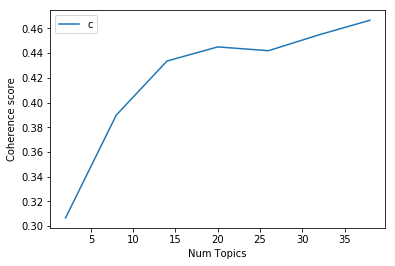

In [18]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3066
Num Topics = 8  has Coherence Value of 0.3898
Num Topics = 14  has Coherence Value of 0.4336
Num Topics = 20  has Coherence Value of 0.445
Num Topics = 26  has Coherence Value of 0.4419
Num Topics = 32  has Coherence Value of 0.4548
Num Topics = 38  has Coherence Value of 0.4666


In [20]:
# select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.043*"instruct" + 0.043*"edit" + 0.036*"photographi" + 0.029*"xp" + '
  '0.016*"journal" + 0.015*"printer" + 0.015*"photoshop" + 0.014*"adob" + '
  '0.014*"learn" + 0.014*"write"'),
 (1,
  '0.056*"wine" + 0.033*"health" + 0.024*"workflow" + 0.024*"gener" + '
  '0.023*"therapi" + 0.020*"medicin" + 0.018*"translat" + 0.017*"massag" + '
  '0.015*"case" + 0.015*"english"'),
 (2,
  '0.059*"tax" + 0.047*"account" + 0.037*"transport" + 0.023*"bank" + '
  '0.022*"estat" + 0.018*"logist" + 0.015*"theori" + 0.014*"real" + '
  '0.014*"python" + 0.013*"small"'),
 (3,
  '0.101*"youth" + 0.068*"oper" + 0.038*"onlin" + 0.028*"safeti" + '
  '0.022*"search" + 0.022*"yacht" + 0.022*"util" + 0.021*"commerci" + '
  '0.019*"mine" + 0.017*"chain"'),
 (4,
  '0.106*"work" + 0.065*"well" + 0.045*"skill" + 0.031*"linux" + '
  '0.019*"custom" + 0.017*"learn" + 0.016*"power" + 0.015*"commun" + '
  '0.014*"written" + 0.011*"solari"'),
 (5,
  '0.090*"plan" + 0.038*"law" + 0.038*"travel" + 0.034*"solut" + 0

In [42]:
def tokenize_flat_list():
    
    def nested_to_flat(line):
        return [word for nested_list in line for word in nested_list]
    
    def all_to_flat():
        return [nested_to_flat(line) for line in tokenized_lines]
    
    return all_to_flat()

tokenize_flat_list = tokenize_flat_list()

In [72]:
import pandas as pd


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=tokenize_flat_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=individual_word_lines)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.sample(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
6205,6205,18.0,0.2585,"engin, analysi, technic, model, coach, team, wind, build, xml, wildlif","[crowdsourc, crowdfund, open, innov, collect, intellig, cocreat, user, gener, content, collabor,..."
8156,8156,15.0,0.4893,"manag, system, servic, process, control, framework, report, project, integr, busi","[eeoc, fmla, eeo, flsa, affirm, action, employe, handbook, union, avoid, employe, relat, leav, a..."
21455,21455,1.0,0.5347,"wine, health, workflow, gener, therapi, medicin, translat, massag, case, english","[quantit, sozialforschung, qualit, forschung, datenanalys, statistik, marktforschung, forschung,..."
21359,21359,9.0,0.3974,"video, secur, trade, product, energi, scienc, valu, map, manufactur, librari","[qbasic, visual, basic, c, turbo, pascal, pascal, dbase, html, basic, jcreator, msdo, turbo, c]"
8583,8583,4.0,0.4044,"work, well, skill, linux, custom, learn, power, commun, written, solari","[energet, team, player, energet, selfstart, energet, leader, posit, team, player, posit, person,..."
8107,8107,0.0,0.2834,"instruct, edit, photographi, xp, journal, printer, photoshop, adob, learn, write","[editori, strategi, editori, editori, project, manag, content, strategi, editor, editori, skill,..."
23048,23048,14.0,0.5025,"architectur, sap, di, home, suppli, gestion, weld, cut, creativ, trend","[sap, project, sap, project, manag, sap, erp, sap, implement, sap, sap, solut, architectur, sap,..."
2425,2425,3.0,0.3571,"youth, oper, onlin, safeti, search, yacht, util, commerci, mine, chain","[bingo, onlin, gambl, game, industri, casino, poker, onlin, game, game, onlin, casino, egam, iga..."
5092,5092,4.0,0.2463,"work, well, skill, linux, custom, learn, power, commun, written, solari","[comput, drive, fax, english, languag, math, interperson, telephon, organis, comun, motiv, danc]"
14691,14691,8.0,0.3292,"develop, commun, social, workshop, manag, relat, public, person, volunt, present","[leadership, develop, coach, execut, team, coach, leadership, develop, execut, coach, busi, perf..."


In [75]:
not_null_lines[23048]

['sap projects',
 'sap project management',
 'sap erp',
 'sap implementation',
 'sap',
 'sap solution architecture',
 'sap functional consultants',
 'sap rand3',
 'sap production planning',
 'sap application development',
 'sap mm']

In [76]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7672,"instruct, edit, photographi, xp, journal, printer, photoshop, adob, learn, write","[neue, medien, digital, medien, journalismu, fernsehen, zeitungen, videoprodukt, medienprodukt, ..."
1,1.0,0.7738,"wine, health, workflow, gener, therapi, medicin, translat, massag, case, english","[health, psycholog, clinic, psycholog, psycholog, assess, psycholog, behavior, medicin, psycholo..."
2,2.0,0.8532,"tax, account, transport, bank, estat, logist, theori, real, python, small","[vector, calculu, multivari, calculu, linear, algebra, differenti, equat, calculu, complex, anal..."
3,3.0,0.7817,"youth, oper, onlin, safeti, search, yacht, util, commerci, mine, chain","[etop, airlin, aviat, commerci, aviat, aircraft, flight, safeti, civil, aviat, b767, b737, b757,..."
4,4.0,0.8039,"work, well, skill, linux, custom, learn, power, commun, written, solari","[strong, custom, servic, skill, excel, oral, written, commun, skill, abil, multitask, relationsh..."
5,5.0,0.8139,"plan, law, travel, solut, yoga, traffic, protect, analysi, tour, tree","[iyengar, yoga, hatha, yoga, yoga, yin, yoga, vinyasa, ashtanga, pranayama, yoga, nidra, medit, ..."
6,6.0,0.8071,"educ, research, vendor, organ, event, structur, wealth, plan, supervis, direct","[ab, cdo, mb, securit, clo, structur, financ, asset, financ, cmb, structur, product, invoic, dis..."
7,7.0,0.7989,"water, javascript, game, css, workplac, php, mysql, jqueri, webspher, studi","[flexion, distract, chiropract, diversifi, techniqu, extrem, adjust, neck, pain, sport, chiropra..."
8,8.0,0.7465,"develop, commun, social, workshop, manag, relat, public, person, volunt, present","[cultur, diplomaci, public, diplomaci, intern, relat, diplomaci, cultur, polici, foreign, polici..."
9,9.0,0.8229,"video, secur, trade, product, energi, scienc, valu, map, manufactur, librari","[lcsh, aacr2, catalog, marc21, oclc, connexion, copi, catalog, librari, scienc, dublin, core, li..."


In [96]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0.0,"instruct, edit, photographi, xp, journal, printer, photoshop, adob, learn, write",1020,0.0353
1,1.0,"wine, health, workflow, gener, therapi, medicin, translat, massag, case, english",1465,0.0506
2,2.0,"tax, account, transport, bank, estat, logist, theori, real, python, small",1286,0.0444
3,3.0,"youth, oper, onlin, safeti, search, yacht, util, commerci, mine, chain",1087,0.0376
4,4.0,"work, well, skill, linux, custom, learn, power, commun, written, solari",1646,0.0569
5,5.0,"plan, law, travel, solut, yoga, traffic, protect, analysi, tour, tree",1088,0.0376
6,6.0,"educ, research, vendor, organ, event, structur, wealth, plan, supervis, direct",1162,0.0402
7,7.0,"water, javascript, game, css, workplac, php, mysql, jqueri, webspher, studi",1793,0.0620
8,8.0,"develop, commun, social, workshop, manag, relat, public, person, volunt, present",1483,0.0513
9,9.0,"video, secur, trade, product, energi, scienc, valu, map, manufactur, librari",1718,0.0594


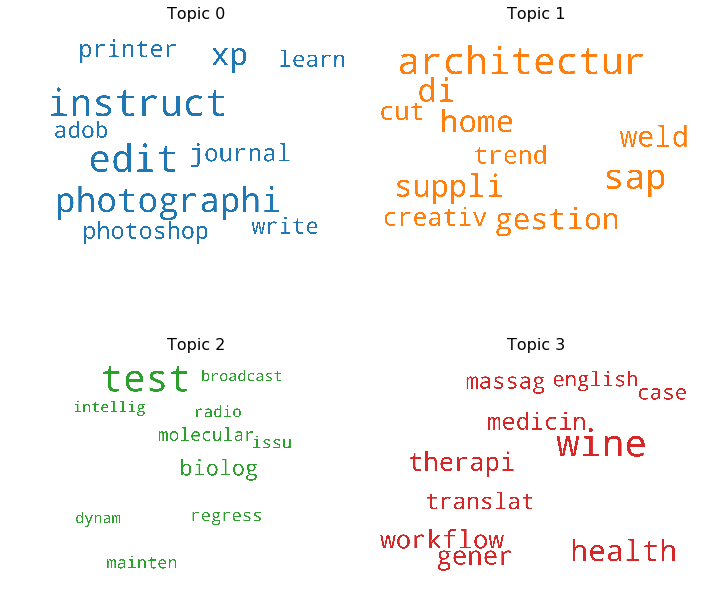

In [49]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

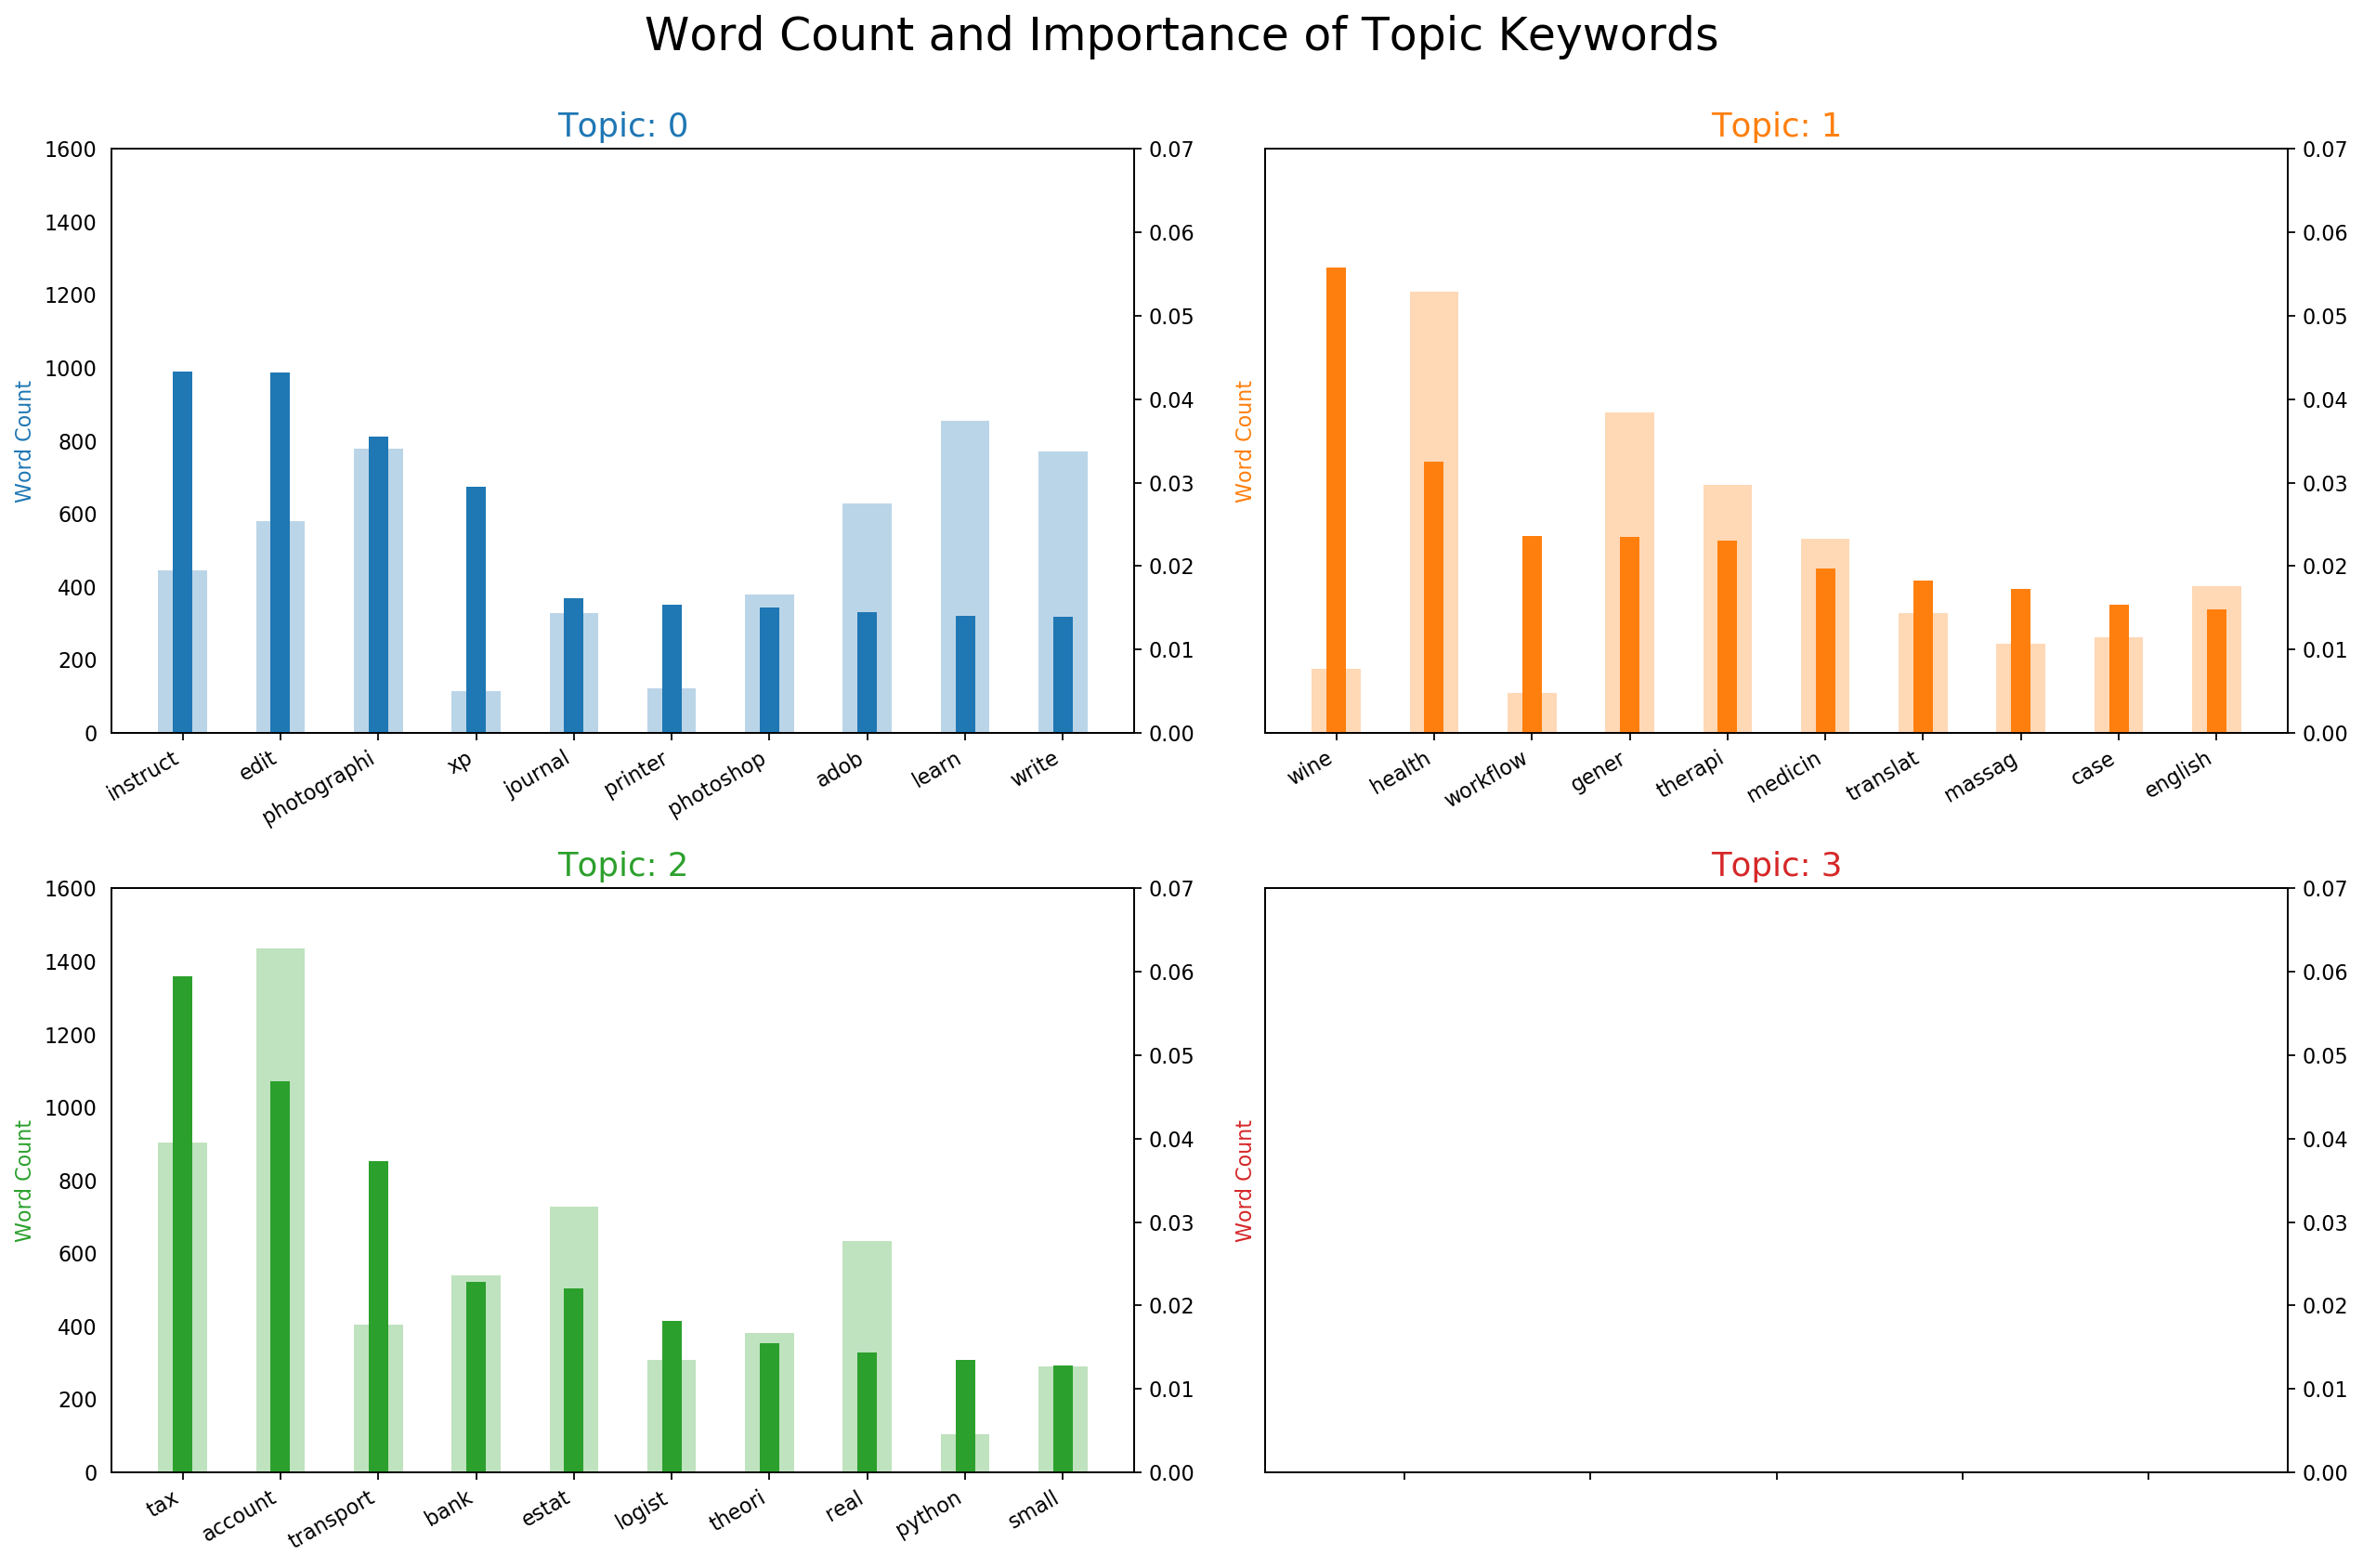

None


In [93]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in individual_word_lines for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.07); ax.set_ylim(0, 1600)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
pprint(plt.show())

IndexError: list index out of range

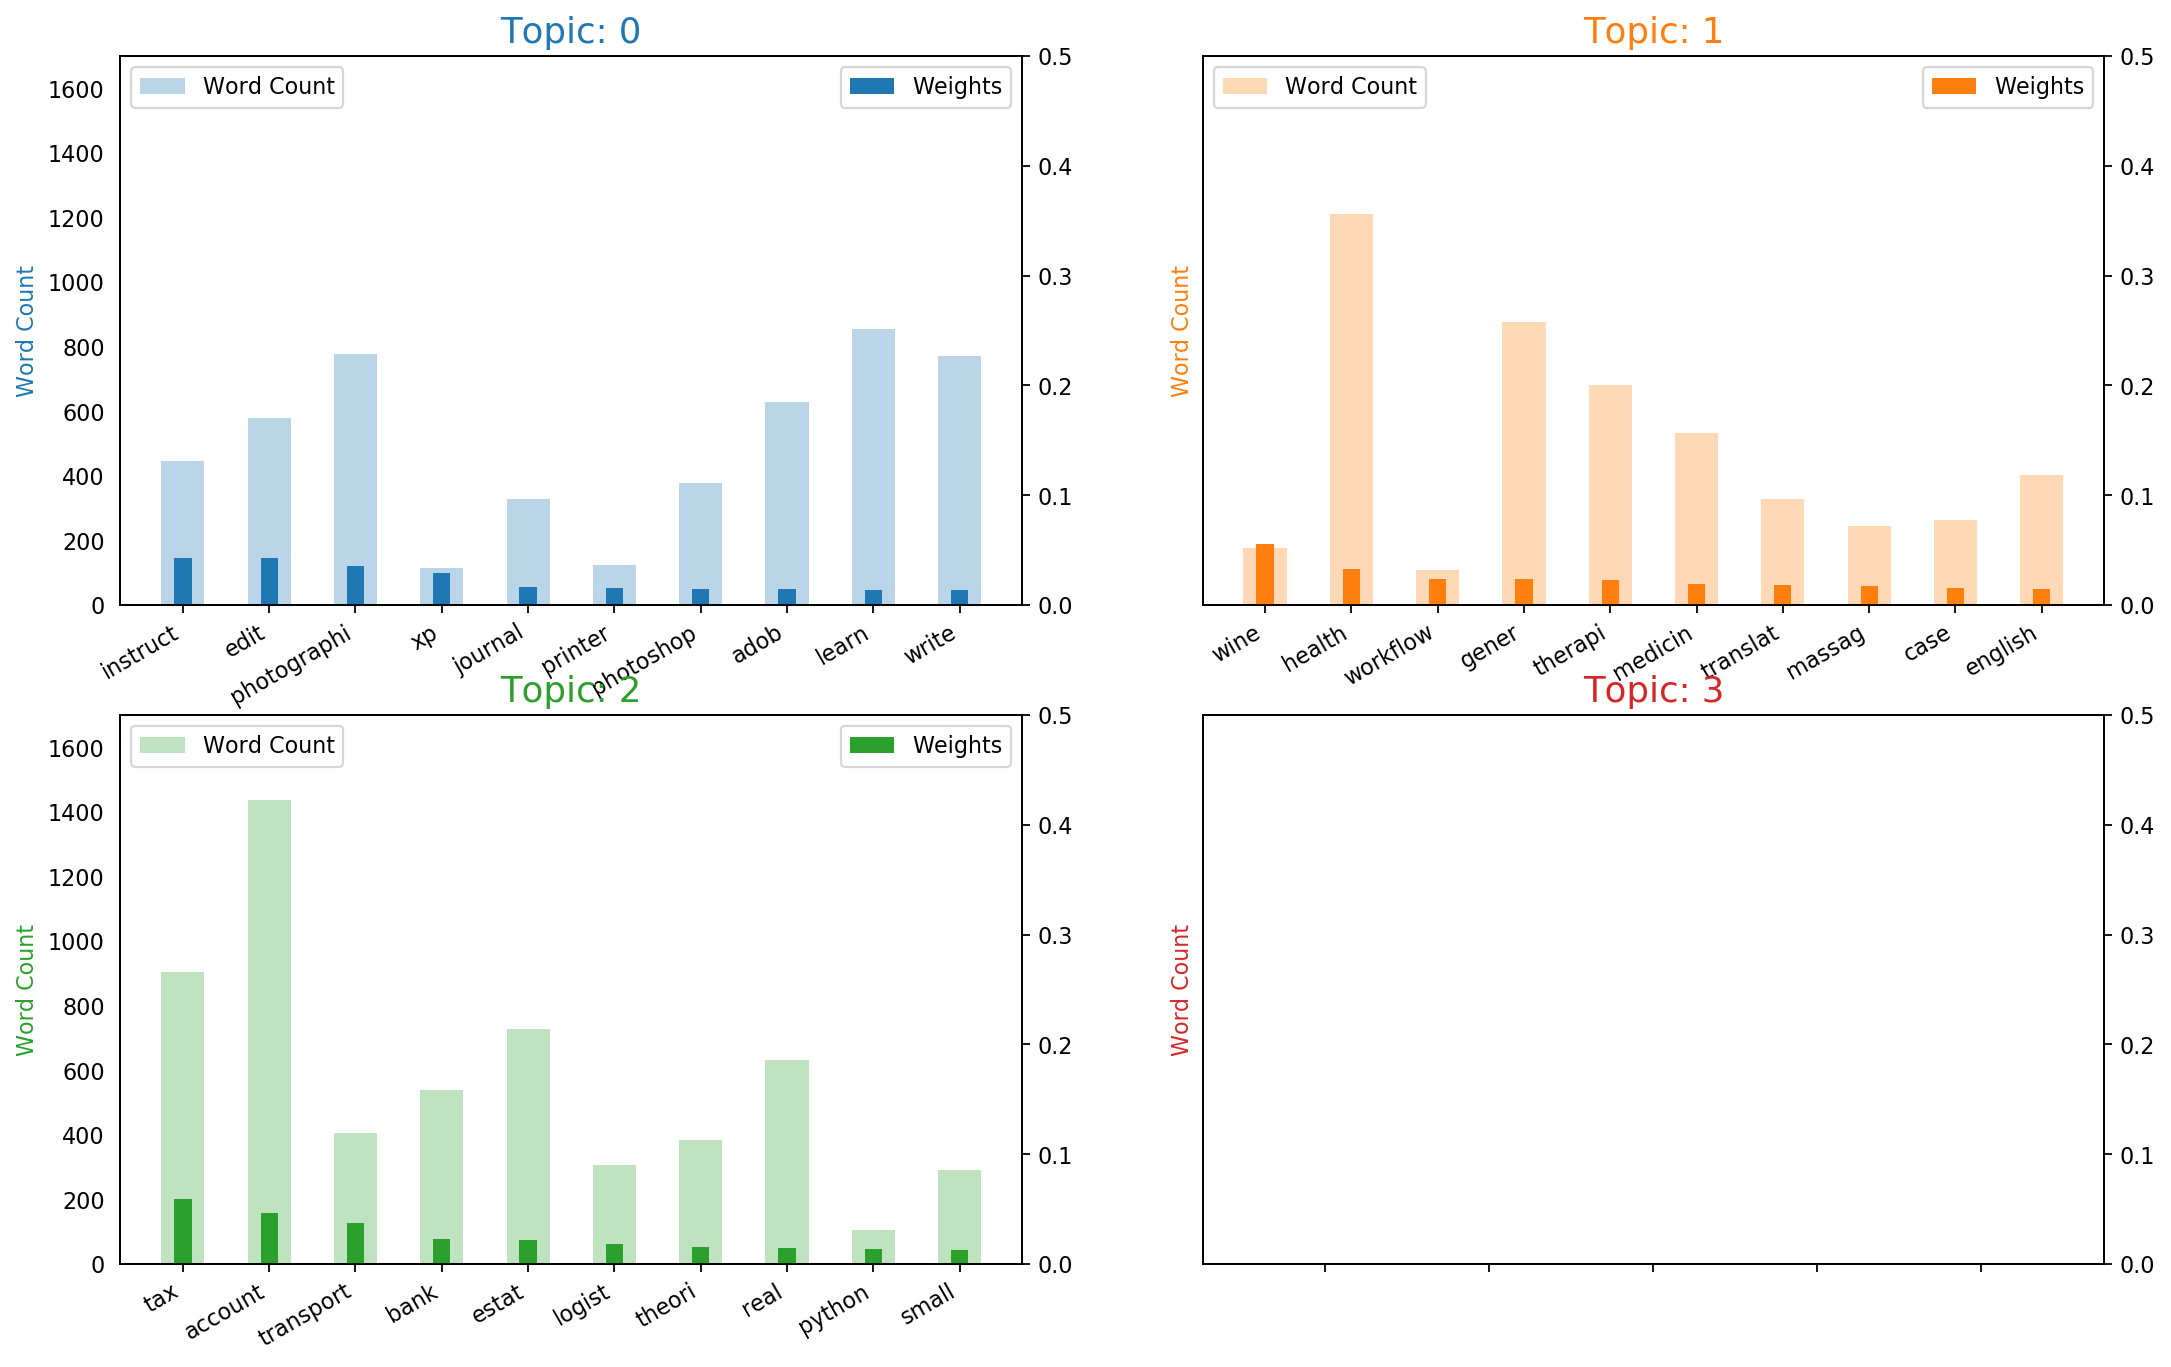

In [85]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in individual_word_lines for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.50); ax.set_ylim(0, 1700)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [52]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17672 samples in 0.023s...
[t-SNE] Computed neighbors for 17672 samples in 4.204s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17672
[t-SNE] Computed conditional probabilities for sample 2000 / 17672
[t-SNE] Computed conditional probabilities for sample 3000 / 17672
[t-SNE] Computed conditional probabilities for sample 4000 / 17672
[t-SNE] Computed conditional probabilities for sample 5000 / 17672
[t-SNE] Computed conditional probabilities for sample 6000 / 17672
[t-SNE] Computed conditional probabilities for sample 7000 / 17672
[t-SNE] Computed conditional probabilities for sample 8000 / 17672
[t-SNE] Computed conditional probabilities for sample 9000 / 17672
[t-SNE] Computed conditional probabilities for sample 10000 / 17672
[t-SNE] Computed conditional probabilities for sample 11000 / 17672
[t-SNE] Computed conditional probabilities for sample 12000 / 17672
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...

IndexError: index 11 is out of bounds for axis 0 with size 10